# RS_basic
* ml-latest-small data를 이용

###전처리 및 EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_links = pd.read_csv("/content/drive/MyDrive/ToBig's/week9/links.csv")
df_movies = pd.read_csv("/content/drive/MyDrive/ToBig's/week9/movies.csv")
df_ratings = pd.read_csv("/content/drive/MyDrive/ToBig's/week9/ratings.csv")
df_tags = pd.read_csv("/content/drive/MyDrive/ToBig's/week9/tags.csv")

In [4]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


* movieId is an identifier for movies used by <https://movielens.org>

* imdbId is an identifier for movies used by <http://www.imdb.com>

* tmdbId is an identifier for movies used by <https://www.themoviedb.org>


In [5]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


[장르의 종류]
* Action 
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In [7]:
#movie의 title 컬럼으로부터 영화 연도를 추출해 낸다.
df_movies['year'] = df_movies['title'].str.extract('(\(\d\d\d\d\))')
df_movies['year'] = df_movies['year'].astype(str)
df_movies['year'] = [x.replace('(',' ') for x in df_movies['year']]
df_movies['year'] = [x.replace(')',' ') for x in df_movies['year']]
df_movies.head()
#df_movies['year'] = df_movies['year'].astype(int) -> nan인 자료가 있음.

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


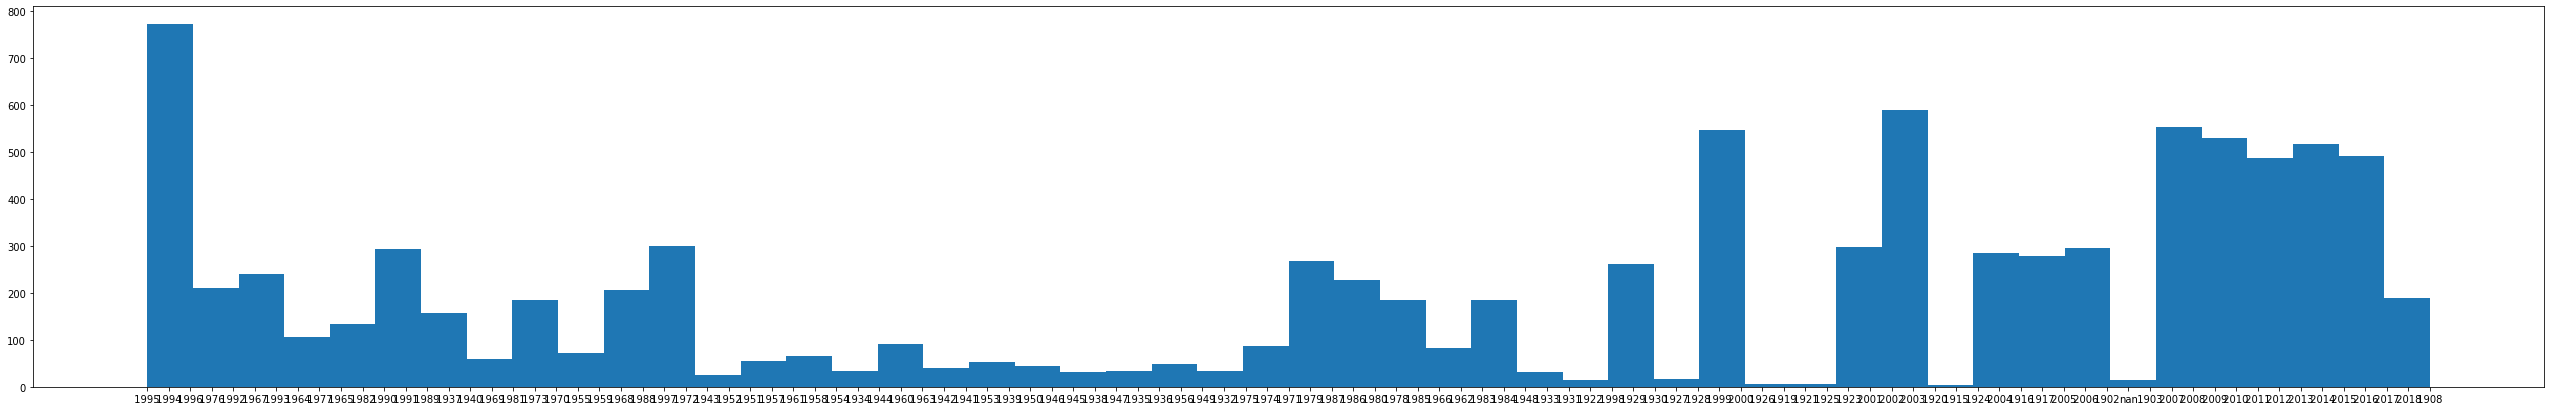

In [8]:
#연도별 영화 분포 확인
plt.subplots(figsize=(45,7))
plt.hist(df_movies['year'], bins=50)
plt.show()

90년대 후반 영화와 2000년대 이후 영화가 많은 비중을 차지하고 있는 것을 알 수 있다.

In [9]:
#|로 구분되어 있는 장르 split해주기
df_movies['genres_split'] = [x.split('|') for x in df_movies['genres'].values]
df_movies.head()

,movieId,title,genres,year,genres_split
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]


In [10]:
# 각각 어떤 장르에 해당하는지 one hot encoding
df_genres = df_movies['genres'].str.get_dummies(sep='|')
df_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [13]:
#각 영화 별로 얼만큼의 평점이 존재하는지, 균일하게 분포되어 있는지 확인한다.
rating_movie = df_ratings['movieId'].value_counts()
rating_movie

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

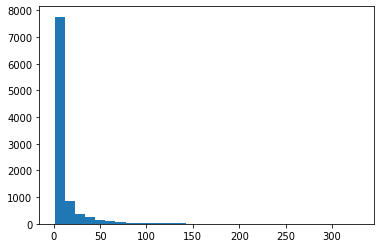

In [14]:
plt.hist(rating_movie, bins=30)
plt.show()

대부분의 영화들이 평가가 50개 이하라는 것을 알 수 있다.

In [15]:
#rating과 movie 데이터를 merge해서 더 자세한 정보를 알아보자
movie_rating = pd.merge(df_movies, df_ratings, on='movieId')
movie_rating.head()

,movieId,title,genres,year,genres_split,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [16]:
#사람들이 많이 rating한 순서를 알아보자

movie_rating.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

포레스트검프를 많이 평가한 것을 알 수 있다.

많이 평가한 영화일수록 평점이 높을까?

In [17]:
#각 영화의 평점 평균을 담은 데이터 프레임을 생성한다.
rating_counts = pd.DataFrame(movie_rating.groupby('title')['rating'].mean())
#각 영화가 몇 번 평가되었는지를 알려주는 컬럼을 추가한다.
rating_counts['counts'] = movie_rating.groupby('title')['rating'].count()

In [18]:
rating_counts.head()

,rating,counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


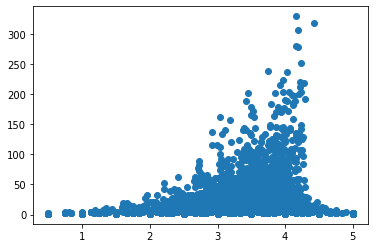

In [19]:
plt.scatter(x = rating_counts['rating'], y = rating_counts['counts'])

대체로 높은 평점을 받았을 때, 많은 평가가 있는 것을 알 수 있다.
* 평균이 5점에 가까운 경우에는 평가 counts가 작은 것으로 보아 소수의 사람들이 높은 점수를 주었을 가능성이 높다.

In [20]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


rating의 평균 : 3.5
* Q1값이 3.0인 것으로 보아 1,2점은 잘 주지 않는 것을 확인할 수 있다.

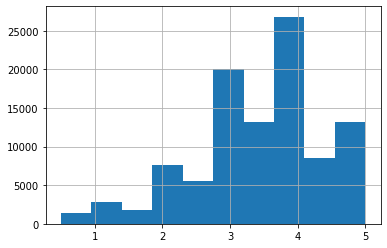

In [21]:
#rating의 점수 비율이 어떻게 되는지 그래프로 확인한다.
df_ratings['rating'].hist()

descirbe를 통해 알아봤던 것처럼 1,2 점은 잘 주지 않고 대체로 4점을 가장 많이 주는 것으로 보인다.

In [22]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## memory based CF

1. memory based 중 item based CF를 이용해 특정 영화를 봤을 때, 그 영화와 유사한 영화를 추천해주는 추천 시스템을 제작해본다.
 - 피어슨 상관계수를 이용해 유사도를 계산한다.

In [23]:
#유사도를 찾기 위해 열 : 영화 타이틀, 행: rating인 matirx를 생성
#데이터의 재구조화를 위해 pd.pivot_table을 이용한다.

user_rating = movie_rating.pivot_table(index = 'userId', columns = 'title', values = 'rating')
user_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


user가 모든 영화를 보고 평점을 남기는 것은 아니기 때문에 nan값이 많이 발생하는 것을 볼 수 있다.

In [24]:
#많은 사람들이 평가를 남겼던 영화 중 하나인 Matrix, The (1999)와 유사한 영화에 대해 추천해보자
Matrix_rate = user_rating['Matrix, The (1999)']
Matrix_rate.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

Matrix_rate는 유저들의 아이디를 인덱스로하는 평가 점수를 가진다.

In [25]:
#타겟 영화(매트릭스)와 다른 영화들간의 correlation 확인
Matrix_rs = user_rating.corrwith(Matrix_rate)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


위와 같이 다른 영화들과 타겟 영화와의 covariance를 측정해준다.

In [26]:
Matrix_rs

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [27]:
#이것을 sort해서 상관계수가 높은 순으로 보여준다.
Matrix_rs.sort_values(ascending = False)

title
Haywire (2011)                                            1.0
Highway 61 (1991)                                         1.0
World on a Wire (Welt am Draht) (1973)                    1.0
War Zone, The (1999)                                      1.0
Hitcher, The (1986)                                       1.0
                                                         ... 
Zoom (2015)                                               NaN
Zulu (2013)                                               NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

In [28]:
Matrix_corr = pd.DataFrame(Matrix_rs, columns=['correlation'])
#dropna를 통해 nan값을 제거한다.
Matrix_corr.dropna(inplace=True)

In [29]:
Matrix_corr.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [30]:
Matrix_corr.sort_values('correlation', ascending = False).head(15)

,correlation
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Paper Towns (2015),1.0
Juwanna Mann (2002),1.0
Topsy-Turvy (1999),1.0


In [31]:
#유사한 영화들 중에서도 다른 사람들의 선택을 많이 받은 영화를 추천해주기 위해 rating count도 추가
Matrix_corr = Matrix_corr.join(rating_counts['counts'])
Matrix_corr.head()

,correlation,counts
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [32]:
#EDA를 통해 대부분의 영화 rate count가 50이하임을 볼 수 있었다.
#따라서 평가 수가 40 이상이면 적정 수준의 평가가 누적되었다고 판단
#유사한 영화 중 평가 수가 40이상인 것만 추출한다. (평점 수가 많을수록 평점이 높은 경향도 있기 때문에)

Matrix_corr[Matrix_corr['counts'] > 40].sort_values('correlation', ascending=False).head(15)

,correlation,counts
title,,
"Matrix, The (1999)",1.000000,278
Tommy Boy (1995),0.674887,50
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145
The Butterfly Effect (2004),0.543840,46


2. KNN 최근접을 이용해서 유사한 영화를 추천해준다. 이때 surprise 라이브러리를 이용해본다.
- KNNBasic()패키지 -> 유저가 매긴 평점 데이터를 바탕으로 시청하지 않은 영화에 대한 평점을 예측해보고, 예측된 영화 중 상위에 속하는 것을 추출해준다

특정 유저아이디를 선택해서 user-based의 추천을 진행해본다. 여기서는 user 123의 정보를 이용해보겠다.

In [33]:
# 특정 유저의 평점 정보를 가져오기 위한 함수 작성
def userId_wtch_movies(userId,cnt):
    userId_genre=pd.DataFrame()
    userId_genre['genre_rating']=pd.merge(df_ratings[(df_ratings['userId'] == userId)],df_movies, on='movieId').groupby('genres')['rating'].mean()
    userId_genre['genre_cnt']=pd.merge(df_ratings[(df_ratings['userId'] == userId)],df_movies, on='movieId').groupby('genres')['rating'].count()
    userId_genre_r = userId_genre.sort_values('genre_cnt',ascending=False)
    
    userId_movie_l = \
    pd.merge(df_ratings[(df_ratings['userId'] == userId)].sort_values('rating',ascending=False).head(cnt),df_movies, on='movieId')
    
    return userId_genre_r, userId_movie_l

In [34]:
genre,wtch=userId_wtch_movies(123,20)

In [35]:
genre.head(10)

,genre_rating,genre_cnt
genres,,
Crime|Drama|Thriller,4.083333,6
Drama,4.125000,4
Action|Adventure|Sci-Fi,4.125000,4
Action|Crime|Thriller,3.500000,2
Mystery|Thriller,4.500000,2
Crime|Drama,4.250000,2
Action|Crime|Drama|Thriller,4.000000,2
Adventure|Fantasy,3.500000,2
Drama|Mystery|Thriller,4.000000,2


In [36]:
wtch.drop(['timestamp'], axis=1)

,userId,movieId,rating,title,genres,year,genres_split
0,123,47,4.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,"[Mystery, Thriller]"
1,123,58803,4.5,21 (2008),Crime|Drama|Romance|Thriller,2008,"[Crime, Drama, Romance, Thriller]"
2,123,116797,4.5,The Imitation Game (2014),Drama|Thriller|War,2014,"[Drama, Thriller, War]"
3,123,115569,4.5,Nightcrawler (2014),Crime|Drama|Thriller,2014,"[Crime, Drama, Thriller]"
4,123,112556,4.5,Gone Girl (2014),Drama|Thriller,2014,"[Drama, Thriller]"
5,123,111759,4.5,Edge of Tomorrow (2014),Action|Sci-Fi|IMAX,2014,"[Action, Sci-Fi, IMAX]"
6,123,109487,4.5,Interstellar (2014),Sci-Fi|IMAX,2014,"[Sci-Fi, IMAX]"
7,123,99114,4.5,Django Unchained (2012),Action|Drama|Western,2012,"[Action, Drama, Western]"
8,123,96829,4.5,"Hunt, The (Jagten) (2012)",Drama,2012,[Drama]
9,123,85414,4.5,Source Code (2011),Action|Drama|Mystery|Sci-Fi|Thriller,2011,"[Action, Drama, Mystery, Sci-Fi, Thriller]"


In [37]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 28.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633965 sha256=6747c75900a9606e6e64077690697cbdbe2c99da63a3779455de258b5094e053
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [38]:
from surprise import Reader, Dataset
from surprise import KNNBasic

In [39]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

In [40]:
# 타겟 유저에 대한 영화 추천 함수 작성
def recommand_movie(userId,cnt):
    userId=userId
    cnt=cnt
    
    #시청한 userId, movieId
    df_movieid_for_uid=df_ratings[(df_ratings['userId'] == userId)][['userId','movieId']]
    
    # userId가 시청하지 않은 movieId
    df_movieid_for_uid_omit=df_movies[~df_movies['movieId'].isin(df_movieid_for_uid['movieId'])]
    recommand = df_movieid_for_uid_omit[['movieId']].values.reshape(-1)
    
    # 시청하지 않은 movieId rate 예측 / KNNBasic 버전
    recm=pd.DataFrame(columns=['userId','movieId','x','rating','desc'])
    for j in recommand:
        a,b,c,d,e=algo.predict(userId,j,)
        e={'was_impossible':e['was_impossible']}
        k=pd.DataFrame({'userId':a,'movieId':b,'x':c,'rating':d,'desc':e}).reset_index()
        recm=recm.append(k)
    
    # rating top 20
    recm = recm[['userId','movieId','rating']].sort_values('rating',ascending=False).head(cnt)
    print(recm)
    
    return recm

코드 참조 : https://github.com/kiakass/DeepLearning/blob/master/CF_recommendation_KNN_SVD.ipynb

In [41]:
algo = KNNBasic()

In [42]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.3)

In [43]:
from surprise import accuracy
# KNNBasic
predictions = algo.fit(trainset).test(testset)
#평가
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9511


0.9510674687995514

In [44]:
#작성한 함수를 이용해 추천 영화 20개 추출
knn_output = recommand_movie(123,20)
pd.merge(knn_output, df_movies, on='movieId')

  userId movieId  rating
0    123  138632     5.0
0    123  131237     5.0
0    123  136850     5.0
0    123  136556     5.0
0    123  136469     5.0
0    123  136447     5.0
0    123   31522     5.0
0    123  134796     5.0
0    123    1151     5.0
0    123  134109     5.0
0    123  134095     5.0
0    123   32387     5.0
0    123   33138     5.0
0    123  132333     5.0
0    123    1112     5.0
0    123  131724     5.0
0    123  130978     5.0
0    123  138966     5.0
0    123    1105     5.0
0    123  130970     5.0


,userId,movieId,rating,title,genres,year,genres_split
0,123,138632,5.0,Tokyo Tribe (2014),Action|Crime|Drama|Sci-Fi,2014,"[Action, Crime, Drama, Sci-Fi]"
1,123,131237,5.0,What Men Talk About (2010),Comedy,2010,[Comedy]
2,123,136850,5.0,Villain (1971),Crime|Drama|Thriller,1971,"[Crime, Drama, Thriller]"
3,123,136556,5.0,Kung Fu Panda: Secrets of the Masters (2011),Animation|Children,2011,"[Animation, Children]"
4,123,136469,5.0,Larry David: Curb Your Enthusiasm (1999),Comedy,1999,[Comedy]
5,123,136447,5.0,George Carlin: You Are All Diseased (1999),Comedy,1999,[Comedy]
6,123,31522,5.0,"Marriage of Maria Braun, The (Ehe der Maria Br...",Drama,1979,[Drama]
7,123,134796,5.0,Bitter Lake (2015),Documentary,2015,[Documentary]
8,123,1151,5.0,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,1994,"[Animation, Comedy, Drama, Fantasy]"
9,123,134109,5.0,Radio Day (2008),Comedy,2008,[Comedy]


## Model_based CF

1. SVD를 이용해서 추천 시스템 구현 (피어슨 상관계수를 접목해서 유사한 영화를 추천해준다.)

In [48]:
#df_movies에서 장르 제외, df_ratings에서 타임스탬프 제외
#두 df를 merge해준다.

df_movies.drop('genres', axis = 1, inplace = True)
df_ratings.drop('timestamp', axis = 1, inplace = True)
df_movies.drop('year', axis = 1, inplace = True)
df_movies.drop('genres_split', axis = 1, inplace = True)

user_movie_data = pd.merge(df_movies, df_ratings, on = 'movieId')

In [49]:
user_movie_data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [57]:
#위에서와 동일하게 pivot_table을 이용해 재구조화한다.
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title')

In [58]:
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


위의 테이블은 현재 사용자 - 영화 기준으로 정리되어있다 -> 영화-사용자 기준으로 만들어서 특정 영화와 비슷한 영화를 추천해주도록 하자.

In [59]:
#앞으로의 계산을 위해 nan값을 0으로 바꿔준다.
user_movie_rating.replace(np.nan, 0, inplace=True)

In [60]:
movie_user_rating = user_movie_rating.values.T #transpose

SVD(특이값 분해)를 이용한다. (기존행렬의 성질과 거의 비슷한 압축된 정보를 얻을 수 있음)

In [62]:
#사이킷런의 TruncatedSVD를 사용
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(9719, 12)

12개의 컴포넌트로 차원을 축소한 것을 볼 수 있다

In [72]:
#축소한 데이터를 이용해서 피어슨 상관게수를 구한다.
corr = np.corrcoef(matrix)

movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)

#아까와 동일하게 매트릭스의 유사한 영화를 추천받아보자
svd_matrix = movie_title_list.index("Matrix, The (1999)")

In [73]:
corr_svd_matrix = corr[svd_matrix]

In [74]:
print(corr_svd_matrix)

[ 0.11650758  0.78272228  0.76628543 ...  0.15841962  0.48904928
 -0.00692828]


In [82]:
list(movie_title[(corr_svd_matrix >= 0.85)])

['Alien (1979)',
 'American Beauty (1999)',
 'American History X (1998)',
 'Big Lebowski, The (1998)',
 'Blade Runner (1982)',
 'Bourne Identity, The (2002)',
 'Bowling for Columbine (2002)',
 'City of Angels (1998)',
 'Clockwork Orange, A (1971)',
 'Contact (1997)',
 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)',
 'Dead Poets Society (1989)',
 'Die Hard (1988)',
 'Donnie Brasco (1997)',
 'Fifth Element, The (1997)',
 'Fight Club (1999)',
 'Full Metal Jacket (1987)',
 'Game, The (1997)',
 'Gattaca (1997)',
 'Gladiator (2000)',
 'Good Will Hunting (1997)',
 'Green Mile, The (1999)',
 'Hamlet (1996)',
 'Indiana Jones and the Last Crusade (1989)',
 'Jackie Brown (1997)',
 'Kill Bill: Vol. 2 (2004)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
 'Matrix, The (1999)',
 'Memento (2000)',
 'M

2. surprise 라이브러리를 이용해서 SVD를 이용한 추천시스템을 구현해본다.

In [83]:
from surprise import SVD
from surprise.model_selection import cross_validate

In [84]:
algo = SVD()

In [86]:
# SVD
predictions = algo.fit(trainset).test(testset)

In [88]:
#KNNBasic에서 작성한 함수를 이용해 같은 유저에 대한 추천 영화 20개 추출
svd_output = recommand_movie(123,20)
pd.merge(svd_output, df_movies, on='movieId')

  userId movieId    rating
0    123    1208  4.612914
0    123    1228  4.582736
0    123    2019  4.569118
0    123    1261  4.504144
0    123    1089  4.489452
0    123  177593  4.479028
0    123    3147  4.477099
0    123     741  4.459208
0    123     922  4.454631
0    123     912  4.443131
0    123    1225  4.440602
0    123     356  4.438768
0    123    1262  4.437364
0    123     923  4.436662
0    123     457  4.426249
0    123    2502  4.419732
0    123    1221  4.411177
0    123    1288  4.398771
0    123    4973  4.396716
0    123    1244  4.385174


,userId,movieId,rating,title
0,123,1208,4.612914,Apocalypse Now (1979)
1,123,1228,4.582736,Raging Bull (1980)
2,123,2019,4.569118,Seven Samurai (Shichinin no samurai) (1954)
3,123,1261,4.504144,Evil Dead II (Dead by Dawn) (1987)
4,123,1089,4.489452,Reservoir Dogs (1992)
5,123,177593,4.479028,"Three Billboards Outside Ebbing, Missouri (2017)"
6,123,3147,4.477099,"Green Mile, The (1999)"
7,123,741,4.459208,Ghost in the Shell (Kôkaku kidôtai) (1995)
8,123,922,4.454631,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
9,123,912,4.443131,Casablanca (1942)


In [85]:
#성능 평가
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8780  0.8702  0.8737  0.8736  0.8735  0.8738  0.0025  
MAE (testset)     0.6734  0.6688  0.6715  0.6703  0.6725  0.6713  0.0016  
Fit time          6.56    5.13    5.10    5.13    5.11    5.41    0.58    
Test time         0.16    0.26    0.15    0.36    0.14    0.22    0.08    


{'test_rmse': array([0.87799522, 0.87021848, 0.8736911 , 0.87355155, 0.87345642]),
 'test_mae': array([0.67338721, 0.66880967, 0.67148706, 0.67030993, 0.67249998]),
 'fit_time': (6.5641045570373535,
  5.127420663833618,
  5.098064184188843,
  5.1327009201049805,
  5.107991933822632),
 'test_time': (0.16298341751098633,
  0.2603182792663574,
  0.15242409706115723,
  0.36023426055908203,
  0.14474129676818848)}

KNNBasic이 더 좋은 성능을 보여주는 것을 알 수 있다.